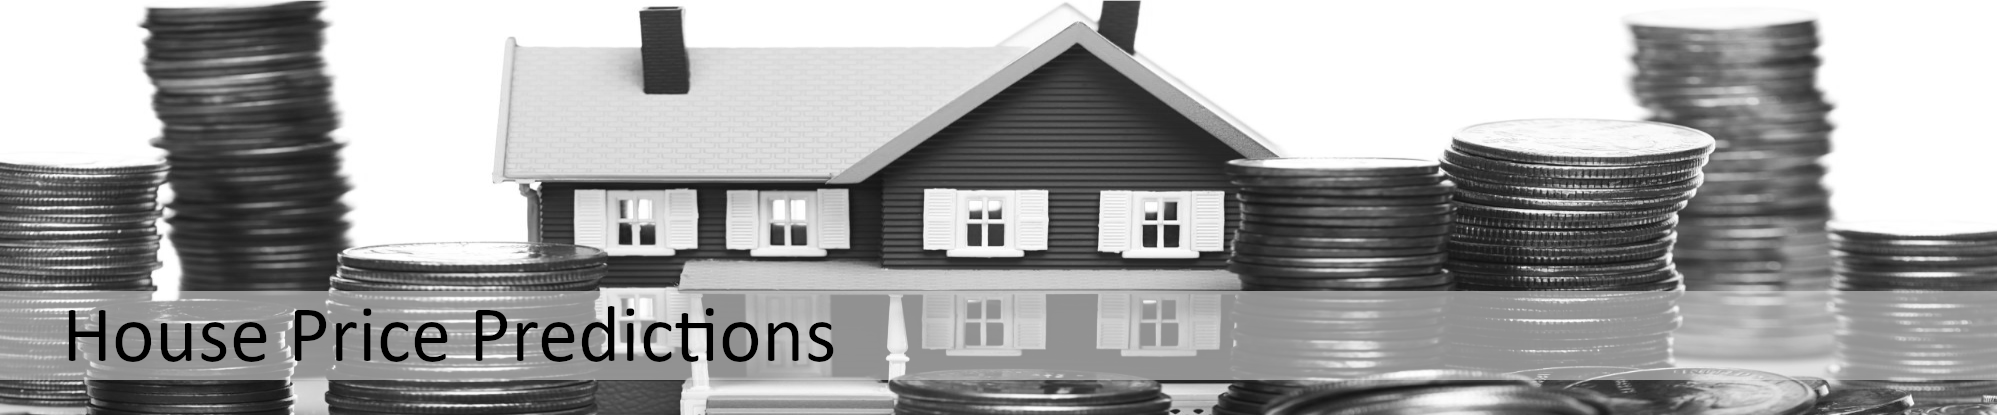

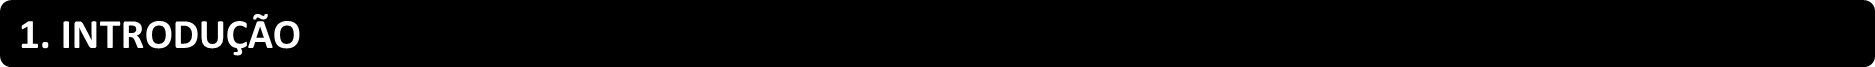

Para este projeto, foi selecionado um Dataset que contém diversos atributos que descrevem uma casa, como número de vagas na garagem, tamanho do lote, material do telhado, entre outros. Cada registro na base de dados descreve não somente as características da propriedade e o processo de venda, mas também o seu valor de venda.


Os dados foram selecionados a partir de uma competição disponível no site do [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

Este notebook é uma alternativa a meu outro projeto, disponível [aqui](https://github.com/ThiagoFerreiraWD/House_Price/blob/main/House%20Prices.ipynb).

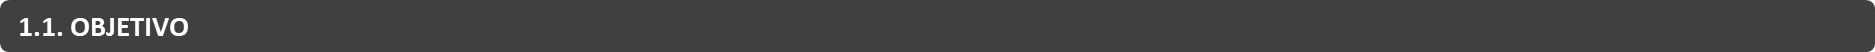

Usando técnicas de Auto ML, a biblioteca [PyCaret](https://pycaret.org) será utilizada para **prever o preço de venda de cada casa**. 

Os dados de teste serão submetidos à análise do Kaggle, e os resultados serão compartilhados no final deste notebook. Assim, poderemos obter uma estimativa mais precisa dos preços de venda das casas.

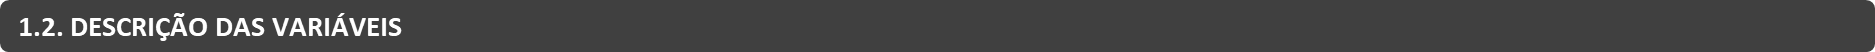

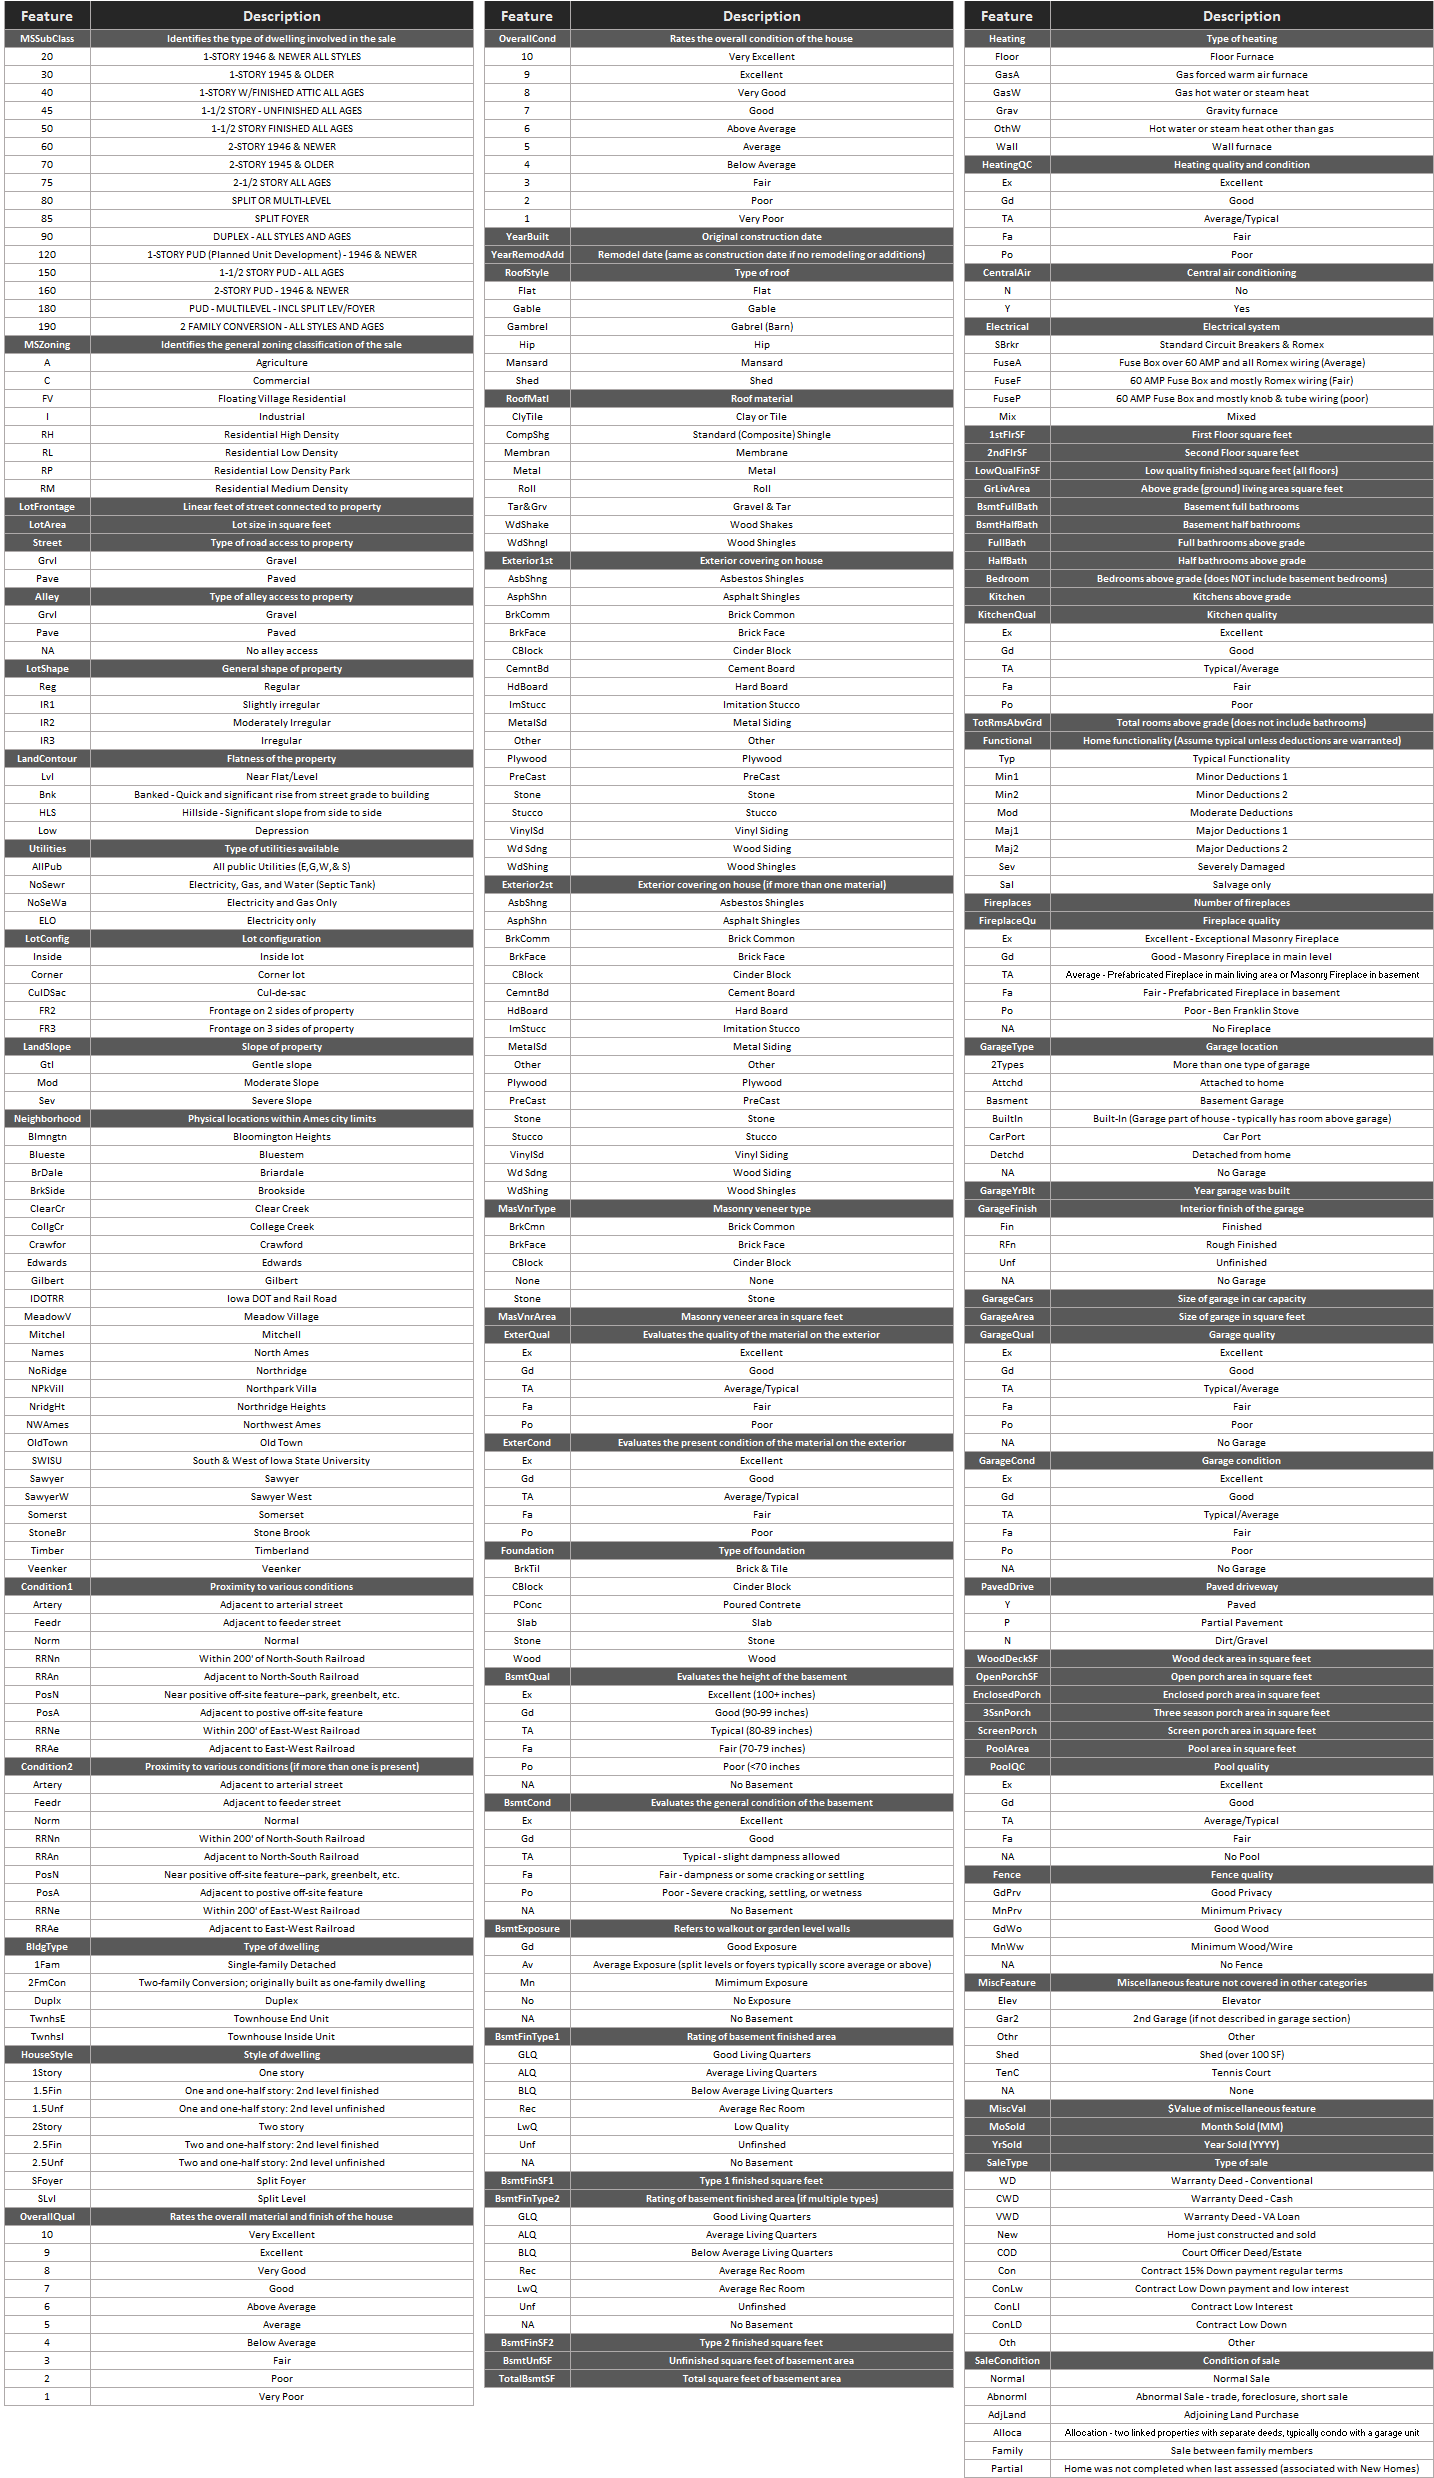

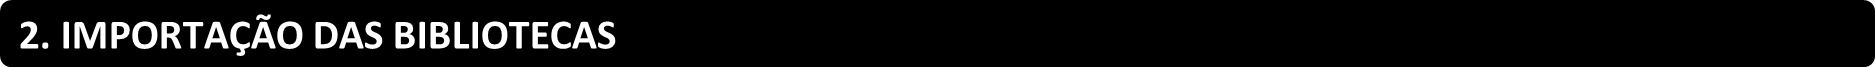

In [1]:
import pycaret
import pandas     as pd
import warnings
from pycaret.regression import *
warnings.filterwarnings('ignore')

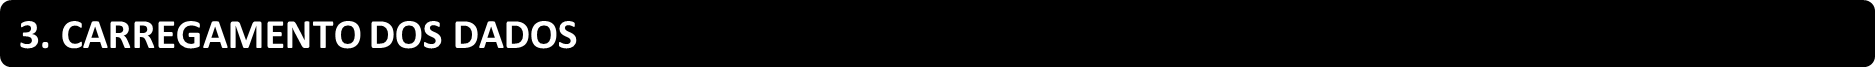

In [2]:
url = 'https://raw.githubusercontent.com/ThiagoFerreiraWD/House_Price/main/train.csv'
df_treino = pd.read_csv(url, index_col=0).reset_index()

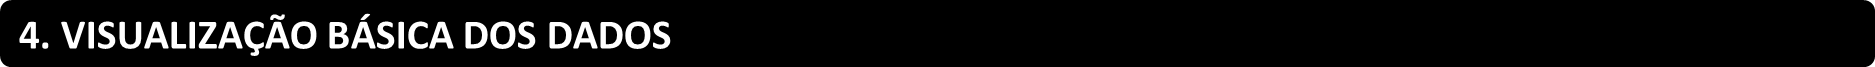

In [3]:
df_treino.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,1044,0,0,1044,0,0,1,0,2,1,Fa,4,Typ,0,NaN,Basment,1952.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
1077,1078,20,RL,NaN,15870,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1969,1969,Gable,CompShg,VinylSd,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,75,Rec,791,230,1096,GasA,Ex,Y,SBrkr,1096,0,0,1096,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1969.0,Fin,1,299,TA,TA,Y,240,32,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Abnorml,138800
1191,1192,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,776,776,GasA,Ex,Y,SBrkr,764,677,0,1441,0,0,2,1,2,1,Gd,5,Typ,0,NaN,Detchd,1999.0,Unf,2,492,TA,TA,Y,206,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,174000
521,522,20,RL,90.0,11988,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,6,6,1957,1957,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,777,Unf,0,467,1244,GasA,Ex,Y,FuseA,1244,0,0,1244,0,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,Unf,1,336,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,150000


In [4]:
print(f'O Dataset\033[0m possui \033[1m{df_treino.shape[0]} registros\033[0m com \033[1m{df_treino.shape[1]} atributos\033[0m cada.')

O Dataset possui 1460 registros com 81 atributos cada.


In [5]:
#Informações básicas do DF
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Exibição descritiva das variáveis numéricas do DF (38 no total).
qtdLinhas = str(df_treino.describe().shape[1]) + ' atributos numéricos no DataFrame.'
display(qtdLinhas, df_treino.describe())

'38 atributos numéricos no DataFrame.'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Exibição descritiva das variáveis categóricas do DF (43 no total).
qtdLinhas = str(df_treino.describe(include='O').shape[1]) + ' atributos categóricos no DataFrame.'
display(qtdLinhas, df_treino.describe(include='O'))

'43 atributos categóricos no DataFrame.'

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


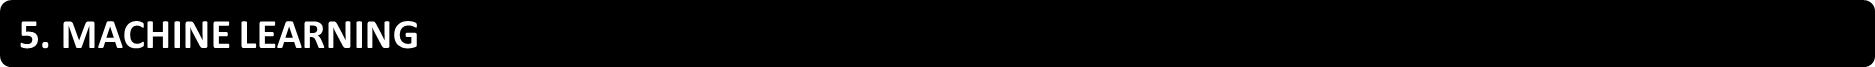

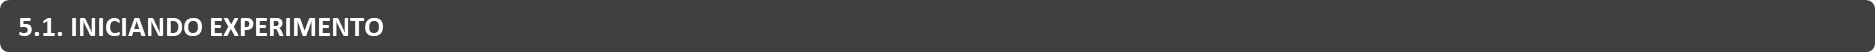

In [8]:
# configuração do ambiente PyCaret, com definição do ambiente e da variável alvo.
exp = setup(data=df_treino, target='SalePrice', session_id=123)

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 406)"


---
Ao analisarmos a tabela acima, percebemos que ela fornece, em sua maior parte, diversas informações relevantes relacionadas ao pipeline de pré-processamento. 

O PyCaret utilizará 1021 amostras no conjunto de treino (Transformed Train Set) e 439 para aferição dos testes (Transformed Test Set).

Como padrão, a biblioteca utilizará a validação cruzada com o k = 10.

---

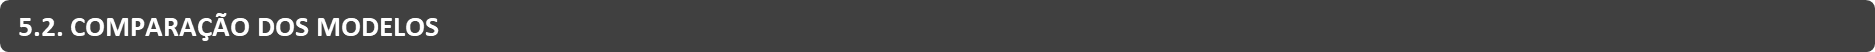

In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18176.6399,859025659.8162,28792.6945,0.8711,0.1436,0.1065,0.0900
lightgbm,Light Gradient Boosting Machine,18318.3259,946947425.3164,30066.1491,0.8603,0.1510,0.1086,0.0350
rf,Random Forest Regressor,19671.8782,1134687363.1055,32779.0251,0.8335,0.1603,0.1163,0.2370
ada,AdaBoost Regressor,26216.3905,1367751843.6292,36596.5361,0.7922,0.2100,0.1715,0.0720
omp,Orthogonal Matching Pursuit,18696.9178,1478177993.7868,35613.1501,0.7708,0.1649,0.1102,0.1260
ridge,Ridge Regression,20504.9288,1513464516.3588,36698.9297,0.7695,0.1954,0.1244,0.0270
et,Extra Trees Regressor,22645.1318,1589750424.4910,38915.2467,0.7615,0.1842,0.1321,0.2650
en,Elastic Net,21611.2547,1710916755.1738,38552.1210,0.7477,0.1723,0.1269,0.0740
lasso,Lasso Regression,20659.2597,1657802902.0318,38412.8487,0.7400,0.2018,0.1262,0.1690
br,Bayesian Ridge,25729.8782,2118899607.2439,43564.2383,0.6838,0.2080,0.1514,0.1000


---

Podemos observar que os algortimos de boosting, são os que obtiveram um melhor desempenho diante a base de dados com relação à métrica R2, atingido valores superiores à 80% nos algoritmos de Gradient Boosting Regressor e Light Gradient Boosting Machine.

A métrica R2, também conhecida como coeficiente de determinação, representa o percentual da variância dos dados que é explicado pelo modelo.

Em consideração à métrica avaliada pelo Kaggle, RMSE, os "líderes" permanecem sendo os mesmos algoritmos. Portanto, utilizaremos o **Grandient Boosting Regressor** a partir daqui.

---

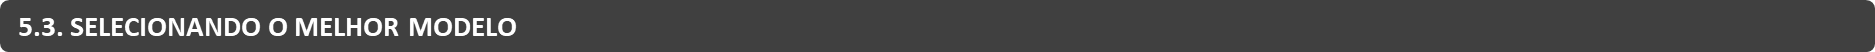

In [10]:
model_gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20932.2913,1660347781.2249,40747.3653,0.7972,0.1812,0.1227
1,17209.3176,713362974.1173,26708.8557,0.8887,0.1295,0.0934
2,15051.3647,444304000.5914,21078.5199,0.9038,0.1343,0.0994
3,16143.3926,708316926.8877,26614.2241,0.8635,0.1372,0.0973
4,20807.8896,1272021480.5503,35665.4101,0.8706,0.1914,0.1375
5,18397.5070,896012728.2035,29933.4717,0.8759,0.1376,0.1054
6,17970.2415,622927358.1105,24958.5127,0.8679,0.1228,0.1008
7,20509.1190,948819668.0133,30802.9166,0.8608,0.1554,0.1178
8,18739.7050,716673104.1781,26770.7509,0.8930,0.1318,0.1048


In [11]:
print(model_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


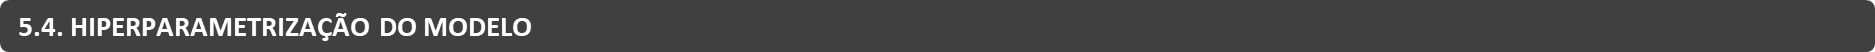

In [12]:
tuned_gbr = tune_model(model_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22441.3057,2786541275.3293,52787.7000,0.6596,0.2039,0.1358
1,17422.3821,738762221.1938,27180.1807,0.8847,0.1319,0.0948
2,13874.2107,371891960.5126,19284.5005,0.9195,0.1209,0.0892
3,17671.5023,763730909.5854,27635.6818,0.8528,0.1482,0.1079
4,23250.9330,1787948367.6012,42284.1385,0.8181,0.1872,0.1390
5,17065.3291,748119161.5325,27351.7671,0.8964,0.1485,0.1041
6,16687.9312,626561584.8210,25031.2122,0.8671,0.1217,0.0927
7,19698.0538,911509395.5516,30191.2139,0.8663,0.1579,0.1168
8,19499.4239,1100778471.1640,33177.9817,0.8357,0.1576,0.1119


In [13]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


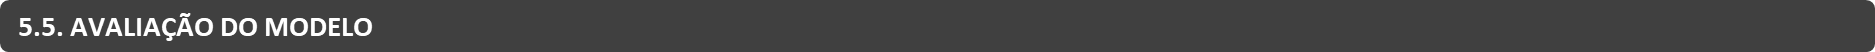

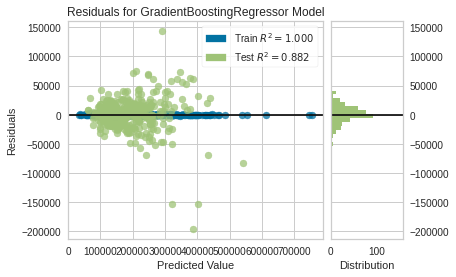

In [14]:
plot_model(tuned_gbr)

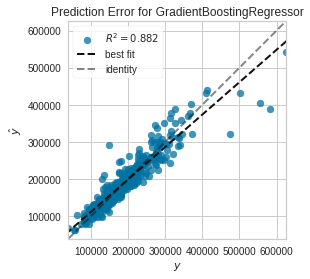

In [15]:
plot_model(tuned_gbr, plot='error')

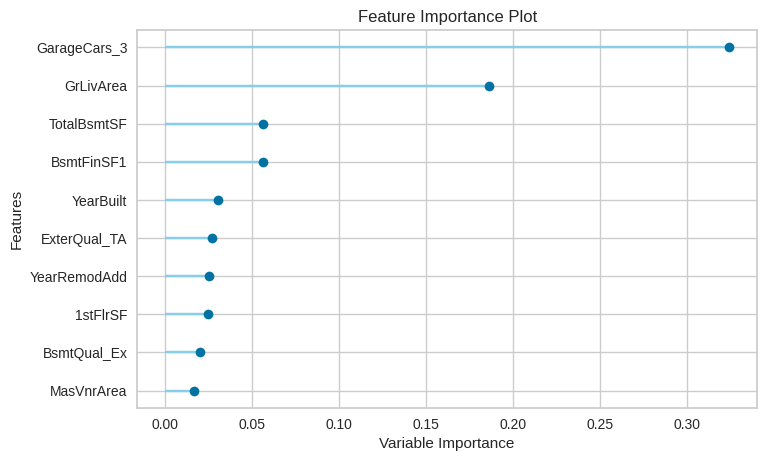

In [16]:
plot_model(tuned_gbr, plot='feature')

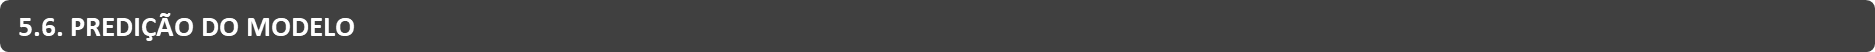

In [17]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15948.7675,677039256.6658,26019.9780,0.8818,0.1207,0.0873


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,69.354309,9505.0,2001.0,2001.0,180.0,0.0,0.0,884.0,884.0,884.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,222500,233615.517308
1,60.000000,9600.0,1900.0,1950.0,0.0,0.0,0.0,1095.0,1095.0,1095.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000,122913.332810
2,32.000000,3363.0,2004.0,2004.0,117.0,0.0,0.0,976.0,976.0,976.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130000,146340.188327
3,75.000000,9750.0,1998.0,1998.0,0.0,975.0,0.0,133.0,1108.0,1108.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274300,260862.605445
4,60.000000,10930.0,1945.0,1950.0,0.0,580.0,0.0,333.0,913.0,1048.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000,147944.165776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,60.000000,6882.0,1914.0,2006.0,0.0,0.0,0.0,684.0,684.0,773.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000,121619.472818
435,50.000000,6000.0,1954.0,1954.0,0.0,0.0,0.0,811.0,811.0,811.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93000,116389.323507
436,80.000000,10240.0,2005.0,2005.0,178.0,0.0,0.0,1030.0,1030.0,1038.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500,273260.871523
437,85.000000,10625.0,2003.0,2004.0,292.0,866.0,0.0,132.0,998.0,1006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000,289747.020525


In [18]:
final_gbr_model = finalize_model(tuned_gbr)

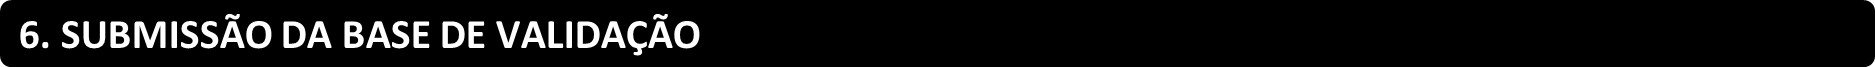

In [19]:
url = 'https://raw.githubusercontent.com/ThiagoFerreiraWD/House_Price/main/test.csv'
df_test = pd.read_csv(url,index_col=0)
df_test = df_test.reset_index()
df_test.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
147,1608,20,RL,88.0,11896,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
676,2137,20,RL,82.0,9488,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Abnorml


In [20]:
predict = predict_model(final_gbr_model, data=df_test)
predict.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
147,1608,20,RL,88.0,11896,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,217473.820830
676,2137,20,RL,82.0,9488,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Abnorml,132726.648182


In [21]:
price = pd.DataFrame(predict)
price.rename(columns={'Label':'SalePrice'}, inplace=True)

df_sub = pd.DataFrame({'Id': predict.Id, 'SalePrice': np.round(price.SalePrice, 0)})
df_sub.to_csv('GradientBoosting.csv', index=False)

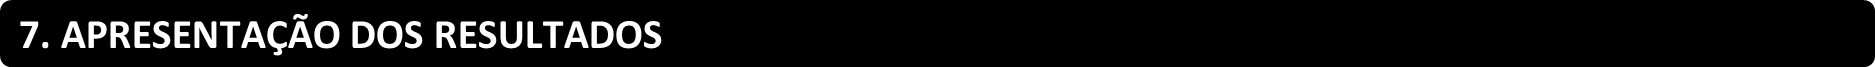

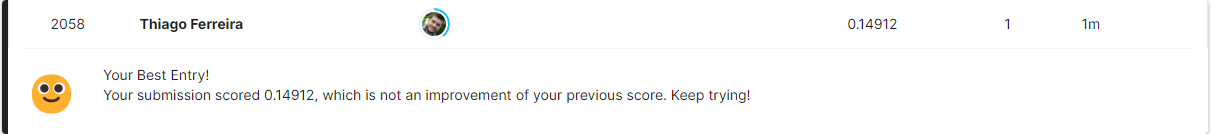

***

Após submissão ao Kaggle, eis o resultado obtido. Lembrando que a métrica utilizada para avaliar o algoritmo foi o RMSE (Root Mean Squarred Error).

***

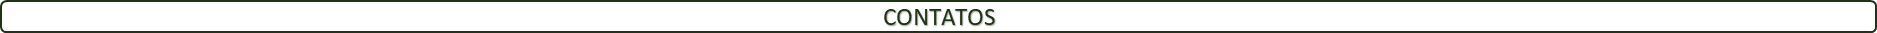

| **Github** 	| **Linkedin** 	| **Kaggle** 	| **Email** 	| **Site** 	|
|:---:	|:---:	|:---:	|:---:	|:---:	|
| [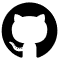](https://www.github.com/ThiagoFerreiraWD) 	| [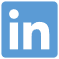](https://www.linkedin.com/in/tferreirasilva) 	| [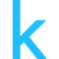](https://www.kaggle.com/thiagoferreirasilva) 	| [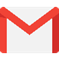](mailto:thiago.ferreirawd@gmail.com) 	| [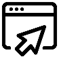](https://thiagoferreirads.com) 	|

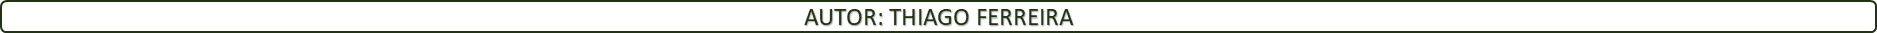